# Figures for Research Rotation Report 
## Convolutional Neural Network for Predicting RNA Secondary Structure
**Harrison LaBollita**
In this notebook, I have th code necessary to produce the figures in my research rotation report.

In [8]:
import torch
from torch.autograd import Variable
import numpy as np
import time
import model as rnaConvNet
import load_data as load
import plot as p
import accuracy as acc
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':'serif', 'serif':['Computer Modern Roman, Times']})

In [2]:
#sources = '/Users/harrisonlabollita/Library/Mobile Documents/com~apple~CloudDocs/Arizona State University/Sulc group/src/code/sequences.txt'
#targets = '/Users/harrisonlabollita/Library/Mobile Documents/com~apple~CloudDocs/Arizona State University/Sulc group/src/code/dotbrackets.txt'

sources = '/Users/harrisonlabollita/Library/Mobile Documents/com~apple~CloudDocs/Arizona State University/Sulc group/src/code/RNA_data_set.csv'
targets = 0


def hyperparameters():
    lr = [1e-2, 1e-3, 1e-4]
    mom = [0.5, 0.7, 0.9]
    batch_size = [100, 100, 100]
    params = [lr[np.random.randint(0,3)], mom[np.random.randint(0,3)], batch_size[np.random.randint(0,3)]]
    return params


def train(convNet, batch_size, Epochs, learningRate, momentum):
    print('-'*30)
    print("  HYPERPARAMETERS  ")
    print('-'*30)
    print("Batch size = ", batch_size)
    print("Learning rate = ", learningRate)
    print("Momentum = ", momentum)
    print("Epochs = ", Epochs)
    print('-'*30)

    # function to call in data
    train_loader, test_loader = load.getTrainingSets(sources, targets, max_seq_length, batch_size)

    # Create loss and optimizer functions
    loss = rnaConvNet.Loss()
    optimizer = rnaConvNet.Optimizer(convNet, learningRate, momentum)
    trainingStartTime = time.time()

    # Start training
    #totalStep = len(train_loader)
    train_acc = []
    val_acc = []
    losses = []
    val_losses = []

    for epoch in range(Epochs):

        runningLoss = 0.0
        totalTrainLoss = 0.0

        startTime = time.time()

        for i, (src, tgt) in enumerate(train_loader):
            temp_acc_list = []

            src = src.view(batch_size, 1, max_seq_length, max_seq_length)

            src = Variable(src)
            tgt = Variable(tgt)

            outputs = convNet(src)

            loss_size = loss(outputs, tgt)

            # Delete the target and source variables to free up memory
            del src

            optimizer.zero_grad()
            loss_size.backward()
            optimizer.step()

            temp_acc_list.append(np.mean(acc.compute_acc(outputs, tgt)))

            del tgt
            del outputs

        train_acc.append(np.mean(temp_acc_list))

        for i, (pred, real) in enumerate(test_loader):

            temp_val_acc = []

            pred = Variable(pred)
            real = Variable(real)

            pred = pred.view(-1, 1, max_seq_length, max_seq_length)

            val_outputs = convNet(pred)
            val_loss_size = loss(val_outputs, real)

            temp_val_acc.append(np.mean(acc.compute_acc(val_outputs, real)))

            del pred
            del real

        val_acc.append(np.mean(temp_val_acc))
        val_losses.append(float(val_loss_size))
        losses.append(float(loss_size.item()))
        print('Epoch: {}/{}, Accuracy: {:0.2f}%, Loss: {:.4f}, Val loss: {:0.4f}, Val Acc: {:0.2f}%, Time: {:0.2f}s'.format(epoch + 1, Epochs, train_acc[epoch]*100, float(loss_size.item()), float(val_loss_size.item()), val_acc[epoch]*100, time.time() - startTime))

    history = [train_acc, val_acc, losses, val_losses]
    return history

In [6]:
sessions = 9
sess = 0
paramsHistory = []
trainingAccuracy = []
trainingValAccuracy = []

while sess <= sessions:

    max_seq_length = 30
    num_classes = 3

    model = rnaConvNet.rnaConvNet(max_seq_length, num_classes)
    params = hyperparameters()

    learning_rate = params[0]
    momentum = params[1]
    batch_size = params[2]
    epochs = 20
    history = train(model, batch_size, epochs, learning_rate, momentum)
    paramsHistory.append(params)
    trainingAccuracy.append(history[0][-1])
    trainingValAccuracy.append(history[0][-1]) # take the last value from the end of the training with these hyperparameters

    #torch.save(model.state_dict(), '/Users/harrisonlabollita/Library/Mobile Documents/com~apple~CloudDocs/Arizona State University/Sulc group/src/explore/cnn code/cnn_trained_model.pt')
    #p.plotmodel_loss(epochs, history[2], history[3], 'Model Loss')
    #p.plotmodel_acc(epochs, history[0], history[1], 'Model Accuracy')
    sess+=1

------------------------------
  HYPERPARAMETERS  
------------------------------
Batch size =  100
Learning rate =  0.0001
Momentum =  0.5
Epochs =  20
------------------------------
Epoch: 1/20, Accuracy: 73.02%, Loss: 0.5368, Val loss: 0.5515, Val Acc: 72.44%, Time: 54.57s
Epoch: 2/20, Accuracy: 72.07%, Loss: 0.5270, Val loss: 0.5225, Val Acc: 71.74%, Time: 57.19s
Epoch: 3/20, Accuracy: 75.31%, Loss: 0.5016, Val loss: 0.5054, Val Acc: 74.99%, Time: 65.41s
Epoch: 4/20, Accuracy: 74.29%, Loss: 0.4917, Val loss: 0.4965, Val Acc: 73.69%, Time: 59.46s
Epoch: 5/20, Accuracy: 74.82%, Loss: 0.4776, Val loss: 0.4864, Val Acc: 74.99%, Time: 54.39s
Epoch: 6/20, Accuracy: 75.89%, Loss: 0.4725, Val loss: 0.4706, Val Acc: 75.69%, Time: 54.61s
Epoch: 7/20, Accuracy: 75.11%, Loss: 0.4804, Val loss: 0.4797, Val Acc: 74.88%, Time: 53.98s
Epoch: 8/20, Accuracy: 74.67%, Loss: 0.4719, Val loss: 0.4540, Val Acc: 77.55%, Time: 68.53s
Epoch: 9/20, Accuracy: 75.49%, Loss: 0.4595, Val loss: 0.4655, Val Acc: 

KeyboardInterrupt: 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


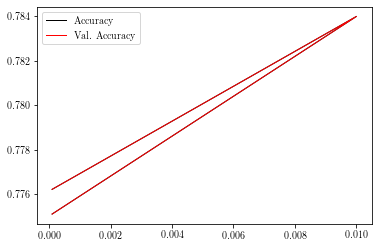

In [9]:
learningRate = [paramsHistory[i][0] for i in range(len(paramsHistory))]
momentum = [paramsHistory[i][1] for i in range(len(paramsHistory))]

plt.figure()
plt.plot(learningRate, trainingAccuracy, 'k-', linewidth = 1, label = 'Accuracy')
plt.plot(learningRate, trainingValAccuracy, 'r-', linewidth = 1, label = 'Val. Accuracy')
plt.legend(loc = 'best')
plt.show()